# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,186-9-120-A--Spectrum--032--Spec.Data 1_CRR_Di...,103.384495,0.036189,1285.750574,0.031649,70.392292,1285.750574,130.108325,0.594120,2.738808,...,1.011173,0.185662,0.016880,1.073746,1.017241,0.083918,0.010257,PseudoVoigtModel,PseudoVoigtModel,No
1,186-9-121-A--Spectrum--051--Spec.Data 1,103.336288,0.022931,1285.918493,0.021248,75.736501,1285.918493,128.598157,0.540480,1.822032,...,1.535377,0.477715,0.014273,1.083582,1.054545,0.088464,0.008235,PseudoVoigtModel,PseudoVoigtModel,No
2,186-9-122-A--Spectrum--055--Spec.Data 1_CRR_Di...,103.390287,0.039793,1285.769293,0.039157,316.163065,1285.769293,848.188812,0.853948,21.798640,...,1.082215,0.023343,0.005402,1.180645,1.155660,0.201466,0.002052,PseudoVoigtModel,PseudoVoigtModel,No
3,187-8-101-A--Spectrum--073--Spec.Data 1,104.027779,0.019688,1284.302233,0.018633,193.945457,1284.302233,637.341249,1.133030,4.509452,...,1.168192,0.511223,0.011684,1.148649,1.148450,0.234490,0.003865,PseudoVoigtModel,PseudoVoigtModel,No
4,187-8-101-MIA--Spectrum--075--Spec.Data 1_CRR_...,103.583955,0.032945,1285.352778,0.030813,63.334741,1285.352778,145.161811,0.910014,2.085126,...,1.217929,0.763367,0.028737,1.217910,1.241901,0.265171,0.009242,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'005 FG04-A1-1-start--Spectrum--004--Information.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 31/31 [00:04<00:00,  6.73it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-1-start--Spectrum--004--Information.txt,"June 3, 2024\n",June,3.0,6.144,45.0,5.0,50.0,"['0h', '3m', '46s']",10:51:23 AM\n,39083.0,1324.964
1,FG04-A1-2-start--Spectrum--005--Information.txt,"June 3, 2024\n",June,3.0,6.107,45.0,5.0,50.0,"['0h', '3m', '46s']",10:56:57 AM\n,39417.0,1324.964
2,FG04-A1-4-start--Spectrum--008--Information.txt,"June 3, 2024\n",June,3.0,6.076,45.0,5.0,50.0,"['0h', '3m', '46s']",11:01:41 AM\n,39701.0,1324.964
3,FG04-A1-16-start--Spectrum--009--Information.txt,"June 3, 2024\n",June,3.0,6.088,60.0,5.0,50.0,"['0h', '5m', '2s']",11:07:28 AM\n,40048.0,1324.964
4,FG19-101-A-start--Spectrum--023--Information.txt,"June 3, 2024\n",June,3.0,6.039,45.0,5.0,50.0,"['0h', '3m', '46s']",11:25:52 AM\n,41152.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-1-start--Spectrum--004--Information'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-1-start--Spectrum--004', 'FG04-A1-2-start--Spectrum--005',
       'FG04-A1-4-start--Spectrum--008',
       'FG04-A1-16-start--Spectrum--009',
       'FG19-101-A-start--Spectrum--023',
       'FG19-101-A-start--Spectrum--024',
       'FG19-101-A-start--Spectrum--025', '186-9-120-A--Spectrum--032',
       '186-9-120-A--Spectrum--033', '186-9-121-A--Spectrum--051',
       '186-9-122-A--Spectrum--055', '186-9-122-B--Spectrum--057',
       '186-9-122-B--Spectrum--058', '186-9-123-B--Spectrum--065',
       '187-8-101-A--Spectrum--073', '187-8-101-MIA--Spectrum--075',
       '187-8-101-B--Spectrum--083', '187-8-102-A--Spectrum--092',
       '187-8-102-B--Spectrum--094', '187-8-102-C--Spectrum--096',
       '187-8-102-D--Spectrum--098', '187-8-102-E--Spectrum--100',
       '187-8-103-A--Spectrum--111', '187-8-103-MIB--Spectrum--115',
       '187-8-103-MIC-bigbub--Spectrum--117',
       'FG04-A1-1-end--Spectrum--124', 'FG04-A1-2-end--Spectrum--125',
       'FG04-A1-4-end--Spectr

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
186-9-120-A--Spectrum--032--Spec.Data 1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['186-9-120-A--Spectrum--032', '186-9-121-A--Spectrum--051',
       '186-9-122-A--Spectrum--055', '187-8-101-A--Spectrum--073',
       '187-8-101-MIA--Spectrum--075', '187-8-102-A--Spectrum--092',
       '186-9-120-A--Spectrum--033', '186-9-122-B--Spectrum--057',
       '187-8-101-B--Spectrum--083', '187-8-102-B--Spectrum--094',
       '187-8-102-C--Spectrum--096', '187-8-102-D--Spectrum--098',
       '187-8-102-E--Spectrum--100', '187-8-103-A--Spectrum--111',
       '187-8-103-MIC-bigbub--Spectrum--117',
       'FG04-A1-1-start--Spectrum--004', 'FG04-A1-2-start--Spectrum--005',
       'FG04-A1-4-start--Spectrum--008',
       'FG04-A1-16-start--Spectrum--009',
       'FG19-101-A-start--Spectrum--023',
       'FG19-101-A-start--Spectrum--024',
       'FG19-101-A-start--Spectrum--025', 'FG04-A1-1-end--Spectrum--124',
       'FG04-A1-2-end--Spectrum--125', 'FG04-A1-4-end--Spectrum--126',
       'FG04-A1-16-end--Spectrum--127', 'FG04-A1-16-end--Spectrum--128',
       'FG19-101-A-end-

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,186-9-120-A--Spectrum--032,103.384495,0.036189,1285.750574,0.031649,70.392292,1285.750574,130.108325,0.594120,2.738808,...,June,3.0,6.011,60.0,3.0,50.0,"['0h', '3m', '6s']",11:41:21 AM\n,42081.0,1324.964
1,186-9-121-A--Spectrum--051,103.336288,0.022931,1285.918493,0.021248,75.736501,1285.918493,128.598157,0.540480,1.822032,...,June,3.0,6.025,60.0,4.0,100.0,"['0h', '4m', '2s']",12:27:29 PM\n,44849.0,1324.964
2,186-9-122-A--Spectrum--055,103.390287,0.039793,1285.769293,0.039157,316.163065,1285.769293,848.188812,0.853948,21.798640,...,June,3.0,6.041,60.0,4.0,100.0,"['0h', '4m', '1s']",12:33:11 PM\n,45191.0,1324.964
3,187-8-101-A--Spectrum--073,104.027779,0.019688,1284.302233,0.018633,193.945457,1284.302233,637.341249,1.133030,4.509452,...,June,3.0,6.102,60.0,4.0,50.0,"['0h', '4m', '1s']",1:14:58 PM\n,47698.0,1324.964
4,187-8-101-MIA--Spectrum--075,103.583955,0.032945,1285.352778,0.030813,63.334741,1285.352778,145.161811,0.910014,2.085126,...,June,3.0,6.106,60.0,4.0,50.0,"['0h', '4m', '1s']",1:19:47 PM\n,47987.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

6.021859640294368e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,186-9-120-A--Spectrum--032,0.173201,0.014851,0.014661,0.002373,103.177506,0.036121,0.000601,0.036189,6.011,...,NaN,NaN,NaN,NaN,NaN,NaN,42081.0,0.997998,0.997992,0.998004
1,186-9-120-A--Spectrum--033,0.166983,0.017376,0.016918,0.003960,103.171675,0.042697,0.000600,0.042779,5.995,...,NaN,NaN,NaN,NaN,NaN,NaN,42281.0,0.997997,0.997991,0.998003
2,186-9-121-A--Spectrum--051,0.149743,0.009874,0.009071,0.003899,103.128166,0.022893,0.000594,0.022931,6.025,...,NaN,NaN,NaN,NaN,NaN,NaN,44849.0,0.997986,0.997980,0.997992
3,186-9-122-A--Spectrum--055,0.174992,0.016302,0.016129,0.002372,103.181919,0.039717,0.000594,0.039793,6.041,...,NaN,NaN,NaN,NaN,NaN,NaN,45191.0,0.997985,0.997979,0.997990
4,186-9-122-B--Spectrum--057,0.186620,0.004369,0.003671,0.002370,103.210504,0.009007,0.000594,0.009005,6.053,...,NaN,NaN,NaN,NaN,NaN,NaN,45482.0,0.997984,0.997978,0.997989


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

6.021859640294368e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,186-9-120-A--Spectrum--032,0.173201,0.014851,0.014661,0.002373,103.177506,0.036121,0.000601,0.036189,6.011,...,NaN,NaN,NaN,NaN,NaN,NaN,42081.0,0.997998,0.997992,0.998004
1,186-9-120-A--Spectrum--033,0.166983,0.017376,0.016918,0.003960,103.171675,0.042697,0.000600,0.042779,5.995,...,NaN,NaN,NaN,NaN,NaN,NaN,42281.0,0.997997,0.997991,0.998003
2,186-9-121-A--Spectrum--051,0.149743,0.009874,0.009071,0.003899,103.128166,0.022893,0.000594,0.022931,6.025,...,NaN,NaN,NaN,NaN,NaN,NaN,44849.0,0.997986,0.997980,0.997992
3,186-9-122-A--Spectrum--055,0.174992,0.016302,0.016129,0.002372,103.181919,0.039717,0.000594,0.039793,6.041,...,NaN,NaN,NaN,NaN,NaN,NaN,45191.0,0.997985,0.997979,0.997990
4,186-9-122-B--Spectrum--057,0.186620,0.004369,0.003671,0.002370,103.210504,0.009007,0.000594,0.009005,6.053,...,NaN,NaN,NaN,NaN,NaN,NaN,45482.0,0.997984,0.997978,0.997989


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_June 3, 2024_fitted_2024-07-08.xlsx


## This helps visualize the errors on each spectra 

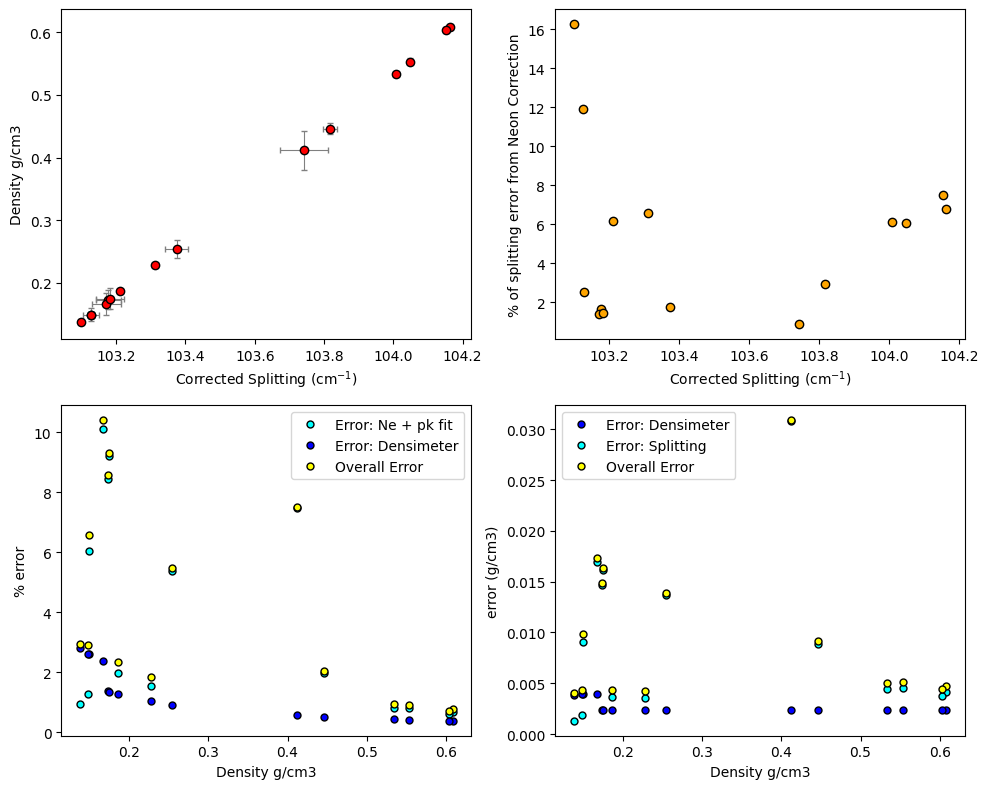

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

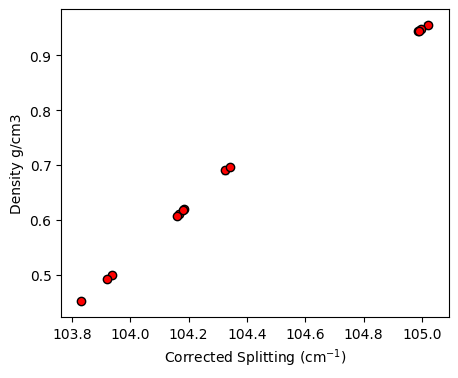

In [21]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [22]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

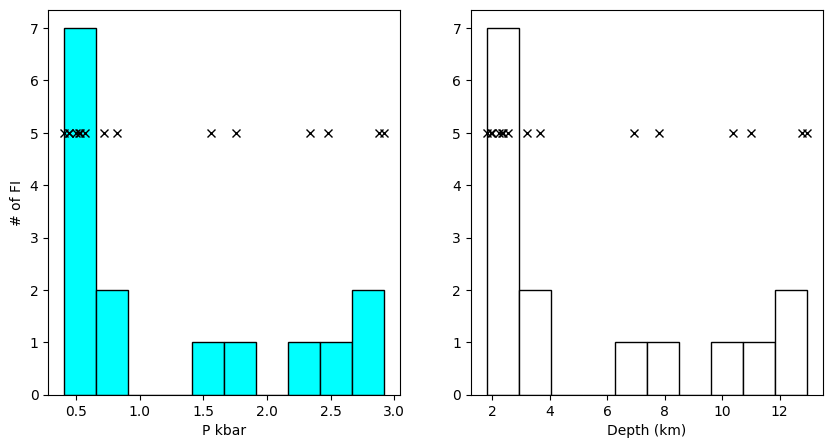

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [20]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3b_Secondary_Peaks is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()